# Tutorial 6: Refactoring R Code

# 1. Introduction

In this tutorial, you will refactor the code into separate scripts corresponding to each section. The dataset we will use comes from the `palmerpenguins` package, which contains measurements of penguins from three species.

## 1.1 Load Libraries and Data

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──
✔ broom        1.0.8     ✔ rsample      1.3.0
✔ dials        1.4.0     ✔ tune         1.3.0
✔ infer        1.0.8     ✔ workflows    1.2.0
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.3.1     ✔ yardstick    1.3.2
✔ recipes      1.3.0     
── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()

# 2. Methods

In this section, we perform exploratory data analysis (EDA) and prepare the data for modeling as seen in <a href="#fig-bill_length" class="quarto-xref">Figure 1</a>.

<figure id="fig-bill_length">
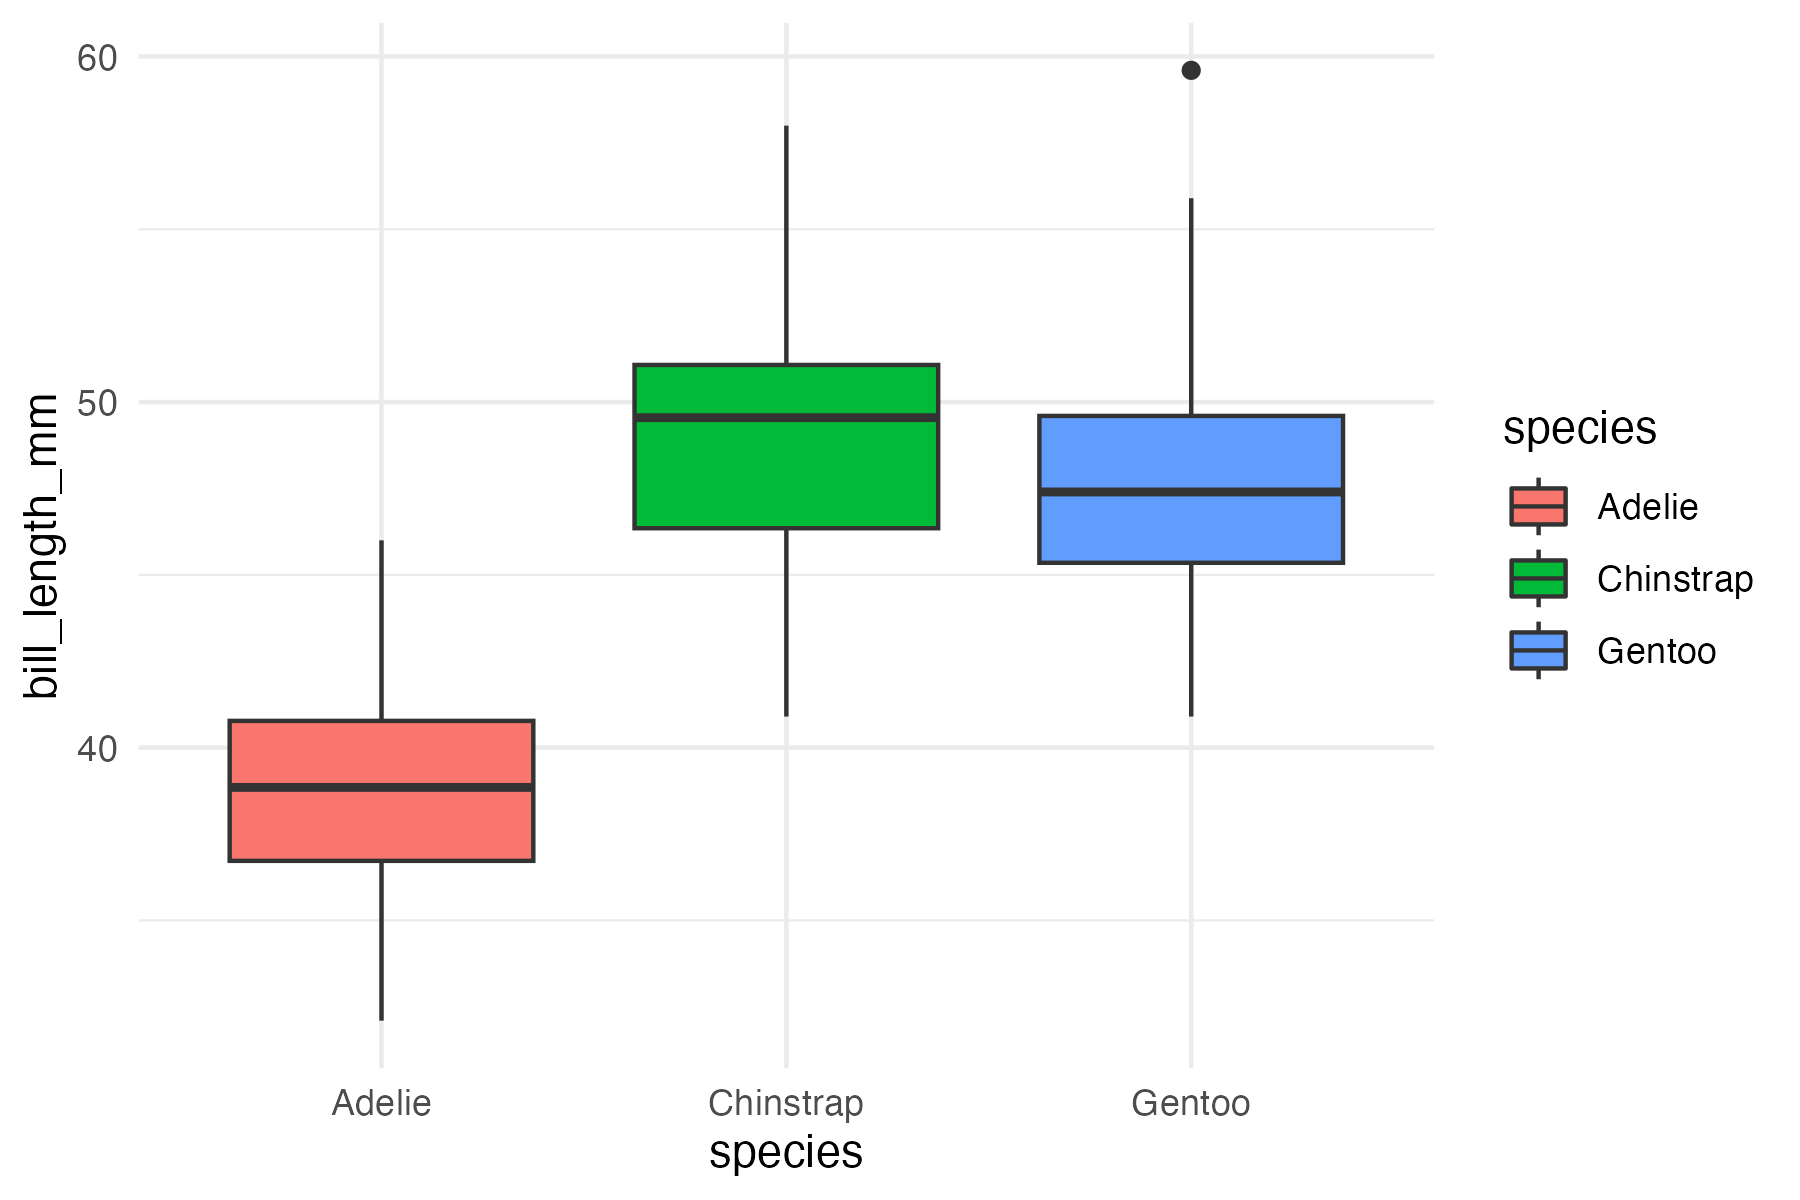
<figcaption>Figure 1: Bill Length</figcaption>
</figure>

In [ ]:
data <- read_csv("data/clean/penguins_ready.csv")

Rows: 333 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (4): bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

In [ ]:
# Summary statistics
glimpse(data)
summarise(data, mean_bill_length = mean(bill_length_mm), mean_bill_depth = mean(bill_depth_mm))

# Visualizations
ggplot(data, aes(x = species, y = bill_length_mm, fill = species)) +
  geom_boxplot() +
  theme_minimal()

# 3. Model

We will fit a classification model using `tidymodels` to predict the species of a penguin based on its physical characteristics.

In [ ]:
penguin_fit <- readRDS("output/penguin_model.rds")

In [ ]:
# Split data
set.seed(123)
data_split <- initial_split(data, strata = species)
train_data <- training(data_split)
test_data <- testing(data_split)

# Define model
penguin_model <- nearest_neighbor(mode = "classification", neighbors = 5) %>%
  set_engine("kknn")

# Create workflow
penguin_workflow <- workflow() %>%
  add_model(penguin_model) %>%
  add_formula(species ~ .)

# Fit model
penguin_fit <- penguin_workflow %>%
  fit(data = train_data)

# 4. Results

We evaluate the performance of the model using the test dataset.

In [ ]:
knitr::kable(readr::read_csv("results/confusion_matrix.csv"))

Rows: 9 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Prediction, Truth
dbl (1): Freq

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

In [ ]:
# Predict on test data
predictions <- predict(penguin_fit, test_data, type = "class") %>%
  bind_cols(test_data)

Warning in model.matrix.default(mt2, test, contrasts.arg = contrasts.arg):
variable '..y' is absent, its contrast will be ignored

# 5. Conclusion

In this tutorial, we:

-   Loaded and cleaned the `palmerpenguins` dataset.
-   Performed exploratory data analysis.
-   Built a k-Nearest Neighbors classification model using `tidymodels`.
-   Evaluated the model’s performance.